In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_mse
from enkf_functions import enkf_regressor_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
# old settings -> the corresponding model shall be extended
setting_dict = {"particles": 1,
                "epochs": 40,
                "batch_size": len(X_train),    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 10

In [6]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]
#particle_list = [2000]

In [7]:
import time

Epoch 41. Training MSE: 0.512, Test MSE: 0.556.
Epoch 42. Training MSE: 0.511, Test MSE: 0.555.
Epoch 43. Training MSE: 0.511, Test MSE: 0.554.
Epoch 44. Training MSE: 0.51, Test MSE: 0.554.
Epoch 45. Training MSE: 0.51, Test MSE: 0.554.
Epoch 46. Training MSE: 0.509, Test MSE: 0.553.
Epoch 47. Training MSE: 0.509, Test MSE: 0.553.
Epoch 48. Training MSE: 0.508, Test MSE: 0.552.
Epoch 49. Training MSE: 0.508, Test MSE: 0.552.
Epoch 50. Training MSE: 0.507, Test MSE: 0.551.
Calculation time for 100 particles: 2.0486180186271667 minutes.


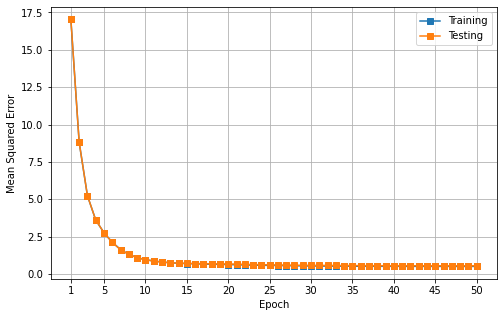

Epoch 41. Training MSE: 0.54, Test MSE: 0.56.
Epoch 42. Training MSE: 0.539, Test MSE: 0.559.
Epoch 43. Training MSE: 0.537, Test MSE: 0.557.
Epoch 44. Training MSE: 0.536, Test MSE: 0.555.
Epoch 45. Training MSE: 0.535, Test MSE: 0.552.
Epoch 46. Training MSE: 0.533, Test MSE: 0.55.
Epoch 47. Training MSE: 0.533, Test MSE: 0.547.
Epoch 48. Training MSE: 0.532, Test MSE: 0.544.
Epoch 49. Training MSE: 0.53, Test MSE: 0.541.
Epoch 50. Training MSE: 0.529, Test MSE: 0.538.
Calculation time for 200 particles: 4.088372512658437 minutes.


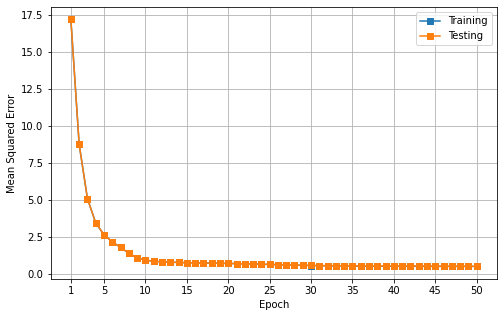

Epoch 41. Training MSE: 0.592, Test MSE: 0.602.
Epoch 42. Training MSE: 0.59, Test MSE: 0.601.
Epoch 43. Training MSE: 0.588, Test MSE: 0.6.
Epoch 44. Training MSE: 0.586, Test MSE: 0.599.
Epoch 45. Training MSE: 0.584, Test MSE: 0.597.
Epoch 46. Training MSE: 0.582, Test MSE: 0.596.
Epoch 47. Training MSE: 0.578, Test MSE: 0.593.
Epoch 48. Training MSE: 0.575, Test MSE: 0.591.
Epoch 49. Training MSE: 0.571, Test MSE: 0.588.
Epoch 50. Training MSE: 0.568, Test MSE: 0.586.
Calculation time for 300 particles: 6.17379922469457 minutes.


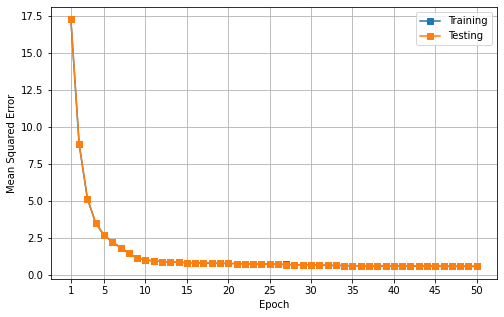

Epoch 41. Training MSE: 0.677, Test MSE: 0.682.
Epoch 42. Training MSE: 0.672, Test MSE: 0.678.
Epoch 43. Training MSE: 0.667, Test MSE: 0.673.
Epoch 44. Training MSE: 0.661, Test MSE: 0.668.
Epoch 45. Training MSE: 0.655, Test MSE: 0.662.
Epoch 46. Training MSE: 0.649, Test MSE: 0.657.
Epoch 47. Training MSE: 0.642, Test MSE: 0.651.
Epoch 48. Training MSE: 0.636, Test MSE: 0.646.
Epoch 49. Training MSE: 0.63, Test MSE: 0.64.
Epoch 50. Training MSE: 0.625, Test MSE: 0.635.
Calculation time for 400 particles: 8.399490674336752 minutes.


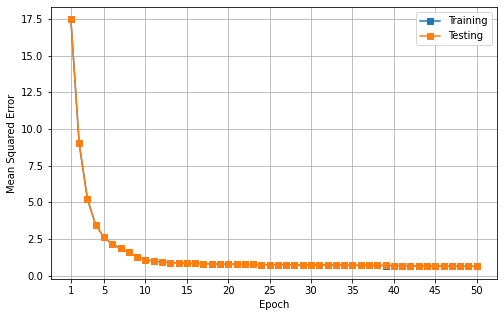

Epoch 41. Training MSE: 0.619, Test MSE: 0.636.
Epoch 42. Training MSE: 0.615, Test MSE: 0.632.
Epoch 43. Training MSE: 0.61, Test MSE: 0.628.
Epoch 44. Training MSE: 0.605, Test MSE: 0.625.
Epoch 45. Training MSE: 0.601, Test MSE: 0.623.
Epoch 46. Training MSE: 0.597, Test MSE: 0.621.
Epoch 47. Training MSE: 0.594, Test MSE: 0.619.
Epoch 48. Training MSE: 0.592, Test MSE: 0.618.
Epoch 49. Training MSE: 0.59, Test MSE: 0.617.
Epoch 50. Training MSE: 0.589, Test MSE: 0.618.
Calculation time for 500 particles: 10.532876495520274 minutes.


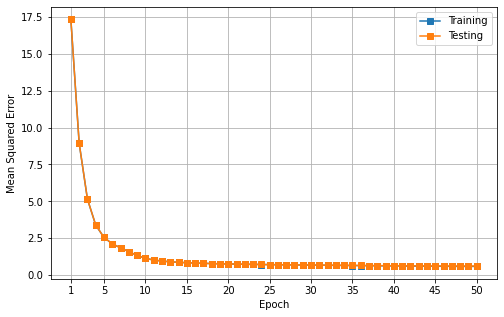

Epoch 41. Training MSE: 0.692, Test MSE: 0.693.
Epoch 42. Training MSE: 0.687, Test MSE: 0.689.
Epoch 43. Training MSE: 0.682, Test MSE: 0.684.
Epoch 44. Training MSE: 0.677, Test MSE: 0.68.
Epoch 45. Training MSE: 0.672, Test MSE: 0.675.
Epoch 46. Training MSE: 0.667, Test MSE: 0.671.
Epoch 47. Training MSE: 0.663, Test MSE: 0.666.
Epoch 48. Training MSE: 0.658, Test MSE: 0.662.
Epoch 49. Training MSE: 0.653, Test MSE: 0.658.
Epoch 50. Training MSE: 0.649, Test MSE: 0.654.
Calculation time for 600 particles: 12.797270993391672 minutes.


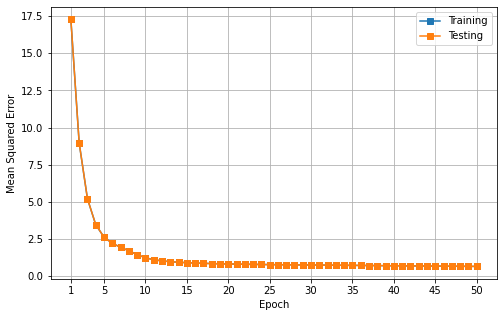

Epoch 41. Training MSE: 0.728, Test MSE: 0.732.
Epoch 42. Training MSE: 0.726, Test MSE: 0.729.
Epoch 43. Training MSE: 0.723, Test MSE: 0.727.
Epoch 44. Training MSE: 0.721, Test MSE: 0.725.
Epoch 45. Training MSE: 0.718, Test MSE: 0.723.
Epoch 46. Training MSE: 0.716, Test MSE: 0.72.
Epoch 47. Training MSE: 0.713, Test MSE: 0.718.
Epoch 48. Training MSE: 0.711, Test MSE: 0.716.
Epoch 49. Training MSE: 0.709, Test MSE: 0.714.
Epoch 50. Training MSE: 0.706, Test MSE: 0.712.
Calculation time for 700 particles: 15.219568423430125 minutes.


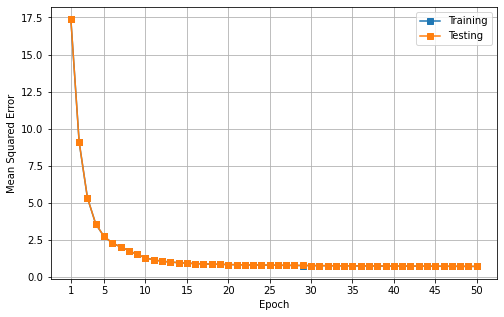

Epoch 41. Training MSE: 0.759, Test MSE: 0.763.
Epoch 42. Training MSE: 0.758, Test MSE: 0.762.
Epoch 43. Training MSE: 0.757, Test MSE: 0.761.
Epoch 44. Training MSE: 0.756, Test MSE: 0.76.
Epoch 45. Training MSE: 0.755, Test MSE: 0.759.
Epoch 46. Training MSE: 0.753, Test MSE: 0.758.
Epoch 47. Training MSE: 0.752, Test MSE: 0.756.
Epoch 48. Training MSE: 0.751, Test MSE: 0.755.
Epoch 49. Training MSE: 0.75, Test MSE: 0.754.
Epoch 50. Training MSE: 0.748, Test MSE: 0.753.
Calculation time for 800 particles: 17.616028475761414 minutes.


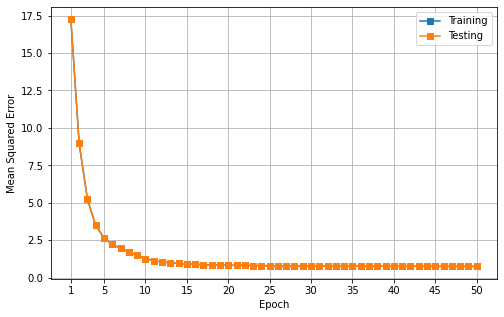

Epoch 41. Training MSE: 0.786, Test MSE: 0.788.
Epoch 42. Training MSE: 0.784, Test MSE: 0.786.
Epoch 43. Training MSE: 0.783, Test MSE: 0.785.
Epoch 44. Training MSE: 0.781, Test MSE: 0.783.
Epoch 45. Training MSE: 0.78, Test MSE: 0.782.
Epoch 46. Training MSE: 0.779, Test MSE: 0.781.
Epoch 47. Training MSE: 0.778, Test MSE: 0.78.
Epoch 48. Training MSE: 0.777, Test MSE: 0.779.
Epoch 49. Training MSE: 0.776, Test MSE: 0.778.
Epoch 50. Training MSE: 0.775, Test MSE: 0.777.
Calculation time for 900 particles: 19.652799423535665 minutes.


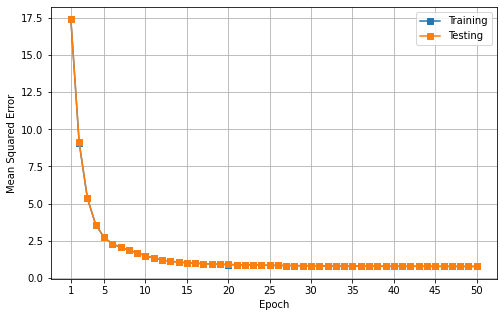

Epoch 41. Training MSE: 0.798, Test MSE: 0.798.
Epoch 42. Training MSE: 0.796, Test MSE: 0.796.
Epoch 43. Training MSE: 0.794, Test MSE: 0.794.
Epoch 44. Training MSE: 0.792, Test MSE: 0.792.
Epoch 45. Training MSE: 0.79, Test MSE: 0.791.
Epoch 46. Training MSE: 0.789, Test MSE: 0.789.
Epoch 47. Training MSE: 0.787, Test MSE: 0.788.
Epoch 48. Training MSE: 0.786, Test MSE: 0.786.
Epoch 49. Training MSE: 0.784, Test MSE: 0.785.
Epoch 50. Training MSE: 0.783, Test MSE: 0.784.
Calculation time for 1000 particles: 23.313841366767882 minutes.


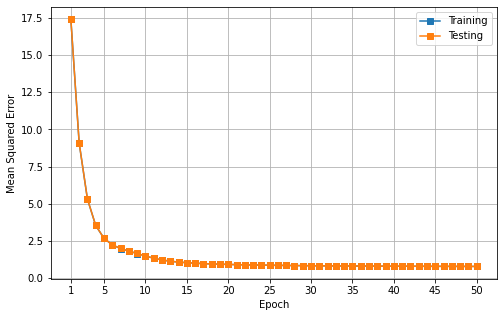

Epoch 41. Training MSE: 0.824, Test MSE: 0.824.
Epoch 42. Training MSE: 0.822, Test MSE: 0.823.
Epoch 43. Training MSE: 0.821, Test MSE: 0.821.
Epoch 44. Training MSE: 0.82, Test MSE: 0.82.
Epoch 45. Training MSE: 0.818, Test MSE: 0.819.
Epoch 46. Training MSE: 0.817, Test MSE: 0.818.
Epoch 47. Training MSE: 0.816, Test MSE: 0.816.
Epoch 48. Training MSE: 0.815, Test MSE: 0.815.
Epoch 49. Training MSE: 0.814, Test MSE: 0.814.
Epoch 50. Training MSE: 0.813, Test MSE: 0.813.
Calculation time for 1500 particles: 42.24810233910878 minutes.


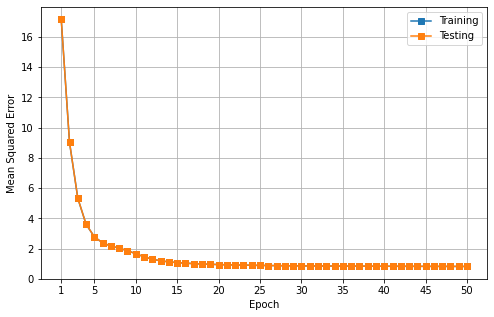

Epoch 41. Training MSE: 0.813, Test MSE: 0.814.
Epoch 42. Training MSE: 0.811, Test MSE: 0.812.
Epoch 43. Training MSE: 0.81, Test MSE: 0.811.
Epoch 44. Training MSE: 0.808, Test MSE: 0.809.
Epoch 45. Training MSE: 0.807, Test MSE: 0.808.
Epoch 46. Training MSE: 0.806, Test MSE: 0.807.
Epoch 47. Training MSE: 0.805, Test MSE: 0.806.
Epoch 48. Training MSE: 0.804, Test MSE: 0.805.
Epoch 49. Training MSE: 0.803, Test MSE: 0.804.
Epoch 50. Training MSE: 0.802, Test MSE: 0.803.
Calculation time for 2000 particles: 68.0523685057958 minutes.


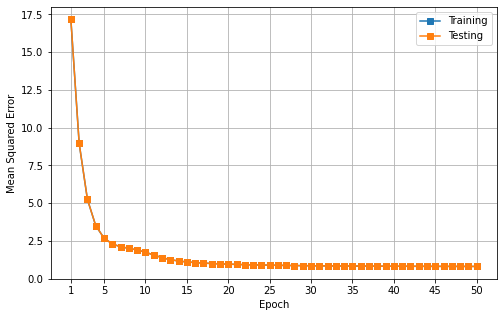

In [8]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model = enkf_regressor_extension(extend_model = "../models/wine/wine_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], p, setting_dict["h_0"]),
                                          additional_epochs = additional_epochs,
                                          save_all = True,
                                          verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_mse(mean_model,
                mse_mean = None,
                start_epoch = 1,
                savefig = True,
                file = "../img/wine/wine_enkf_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], p, setting_dict["h_0"]))